<br>
<br>
<center>
    
# 人工智能高阶人才培训班

<br>

> ## 第三课：深度学习基础设施与工具(1)
</center>
<br>

## Part 1 TensorFlow基础

### 1.1 TensorFlow的安装

```python
# Current stable release for CPU-only
pip install tensorflow==2.0.0

# Preview nightly build for CPU-only (unstable)
pip install tf-nightly

# Install TensorFlow 2.0 GPU version
pip install tensorflow-gpu==2.0.0
```

### 1.2查看版本

In [22]:
import tensorflow as tf
tf.__version__

'2.0.0'

### 1.3 Hello World

In [94]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")
#
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


> b’String’  ‘b’ indicates Bytes literals.  http://stackoverflow.com/questions/6269765/

In [95]:
x = [[2.]]
m = tf.square(x)
print(m)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


调用`.numpy`方法可以实现tensor和ndarray之间转换

In [102]:
m.numpy()

array([[4.]], dtype=float32)

In [104]:
a = tf.constant([[1, 2],
                 [3, 4]])

b = tf.constant([[2, 1],
                 [3, 4]])

ab = tf.matmul(a, b)

print('a * b = \n', ab.numpy())

a * b = 
 [[ 8  9]
 [18 19]]


### 1.4 EveryThing is Tensor
> 在人工智能领域只有一种类型数据，它的名字叫做『Tensor』

![](img/tensor_rank.png)

#### 1. 标量（0D 张量）
仅包含一个数字的张量叫作标量（scalar，也叫标量张量、零维张量、0D 张量）。

In [1]:
import numpy as np
x = np.array(888)
x

array(888)

In [2]:
x.ndim

0

#### 2. 向量(1D 张量)
数字组成的数组叫作向量（vector）或一维张量（1D 张量）

In [4]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


#### 3. 矩阵(2D 张量)
向量组成的数组叫作矩阵（matrix）或二维张量（2D 张量）。

In [6]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1], 
    [7, 80, 4, 36, 2]])
print(x.ndim)

2


#### 4. 3D张量与更高维张量
将多个矩阵组合成一个新的数组，可以得到一个 3D 张量，你可以将其直观地理解为数字组成的立方体。

In [8]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]]])
print(x.ndim)
print(x.shape)

3
(3, 3, 5)


张量是由以下三个关键属性来定义的: 

 轴的个数（阶）。例如，3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中 也叫张量的 `ndim`。

 形状。这是一个整数元组，表示张量沿每个轴的维度大小（元素个数）。例如，前面矩阵示例的形状为(3, 5)，3D 张量示例的形状为(3, 3, 5)。向量的形状只包含一个元素，比如 (5,)，而标量的形状为空，即 ()。

 数据类型（在 Python 库中通常叫作 dtype）。这是张量中所包含数据的类型，例如，张量的类型可以是 float32、uint8、float64 等。在极少数情况下，你可能会遇到字符
（char）张量。注意，Numpy（以及大多数其他库）中不存在字符串张量，因为张量存储在预先分配的连续内存段中，而字符串的长度是可变的，无法用这种方式存储。

#### 现实世界中的数据张量
- 向量数据：2D 张量，形状为 (samples, features)。

- 时间序列数据或序列数据：3D 张量，形状为 (samples, timesteps, features)。 

- 图像：4D张量，形状为(samples, height, width, channels)或(samples, channels, height, width)。

- 视频：5D张量，形状为(samples, frames, height, width, channels)或(samples, frames, channels, height, width)。

##### 向量数据
这是最常见的数据。对于这种数据集，每个数据点都被编码为一个向量，因此一个数据批量就被编码为 2D 张量（即向量组成的数组），其中第一个轴是样本轴，第二个轴是特征轴。

我们来看两个例子。 

- 人口统计数据集，其中包括每个人的年龄、邮编和收入。每个人可以表示为包含 3 个值 的向量，而整个数据集包含 100 000 个人，因此可以存储在形状为 (100000, 3) 的 2D 张量中。

- 文本文档数据集，我们将每个文档表示为每个单词在其中出现的次数（字典中包含 20 000 个常见单词）。每个文档可以被编码为包含 20 000 个值的向量（每个值对应于 字典中每个单词的出现次数），整个数据集包含 500 个文档，因此可以存储在形状为 (500, 20000) 的张量中。

##### 时间序列数据或序列数据
![111111](img/time_serial_data.png)

**举例**：
- 股票价格数据集。每一分钟，我们将股票的当前价格、前一分钟的最高价格和前一分钟 的最低价格保存下来。因此每分钟被编码为一个 3D 向量，整个交易日被编码为一个形 状为(390, 3)的 2D 张量（一个交易日有 390 分钟），而 250 天的数据则可以保存在一 个形状为(250, 390, 3)的 3D 张量中。这里每个样本是一天的股票数据。

- 推文数据集。我们将每条推文编码为 280 个字符组成的序列，而每个字符又来自于 128 个字符组成的字母表。在这种情况下，每个字符可以被编码为大小为 128 的二进制向量 （只有在该字符对应的索引位置取值为 1，其他元素都为 0）。那么每条推文可以被编码 为一个形状为 (280, 128) 的 2D 张量，而包含 100 万条推文的数据集则可以存储在一 个形状为 (1000000, 280, 128) 的张量中。

##### 图像数据
![](img/image_data.png)

**举例**：

如果图像大小为 256×256，那么 128 张灰度图像组成的批 量可以保存在一个形状为(128, 256, 256, 1)的张量中，而 128 张彩色图像组成的批量则可以保存在一个形状为(128, 256, 256, 3)的张量中。

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
print("images shape: %s" % str(digits.images.shape))
print("targets shape: %s" % str(digits.target.shape))

images shape: (1797, 8, 8)
targets shape: (1797,)


In [13]:
img = digits.images[0]

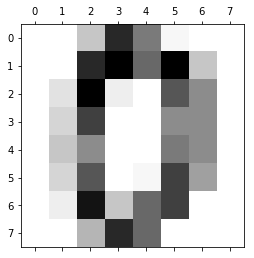

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(img, cmap=plt.cm.Greys);

In [15]:
img.shape

(8, 8)

In [16]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**数据批量的概念（Batch Size）**

In [18]:
batch01 = digits.images[:128]
batch02 = digits.images[128:256]

In [19]:
from PIL import Image
color_img = Image.open("img/logo.jpg")

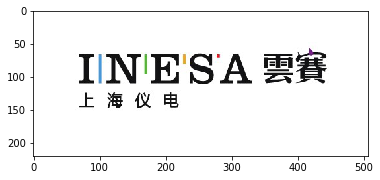

In [20]:
plt.imshow(color_img)

In [21]:
import numpy as np
color_img = np.array(color_img)
color_img.shape

(220, 507, 3)

##### 视频数据

视频可以看作一系列帧， 每一帧都是一张彩色图像。由于每一帧都可以保存在一个形状为 (height, width, color_ depth) 的 3D 张量中，因此一系列帧可以保存在一个形状为 (frames, height, width, color_depth) 的 4D 张量中，而不同视频组成的批量则可以保存在一个 5D 张量中，其形状为 (samples, frames, height, width, color_depth)。

**举例**：
一个以每秒 4 帧采样的 60 秒视频片段，视频尺寸为 144×256，这个
视频共有 240 帧。4 个这样的视频片段组成的批量将保存在形状为(4, 240, 144, 256, 3) 的张量中。总共有 106 168 320 个值！如果张量的数据类型（dtype）是 float32，每个值都是 32 位，那么这个张量共有 405MB。

#### TensorFlow中的数据表示

> tf.constant creates a tf.Tensor from a fixed value
> you can read more here:
>  https://www.tensorflow.org/api_docs/python/tf/constant

In [105]:
# 0-D tensor (scalar)
t_0d_py = 4

# 1-D tensor (vector)
t_1d_py = [1, 2, 3]

# 2-D tensor (matrix)
t_2d_py = [[1, 2], 
           [3, 4], 
           [5, 6]]

# 3-D tensor
t_3d_py = [[[0, 0], [0, 1], [0, 2]],
           [[1, 0], [1, 1], [1, 2]],
           [[2, 0], [2, 1], [2, 2]]]

python_defined_tensors = [t_0d_py, t_1d_py, t_2d_py, t_3d_py]

for pdt in python_defined_tensors:
    print(tf.constant(pdt))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[[0 0]
  [0 1]
  [0 2]]

 [[1 0]
  [1 1]
  [1 2]]

 [[2 0]
  [2 1]
  [2 2]]], shape=(3, 3, 2), dtype=int32)


#### 联想：NumPy Arrays
tensorflow中的`Tensor`和`numpy.array`定义的矩阵是等价的

In [5]:
import numpy as np
# 0-D tensor (scalar)
t_0d_np = np.array(4, dtype=np.int32)

# 1-D tensor (vector)
t_1d_np = np.array([1, 2, 3], dtype=np.int64)

# 2-D tensor (matrix)
t_2d_np = np.array([[1, 2], 
                    [3, 4], 
                    [5, 6]],
                   dtype=np.float32)

# 3-D tensor
t_3d_np = np.array([[[0, 0], [0, 1], [0, 2]],
                    [[1, 0], [1, 1], [1, 2]],
                    [[2, 0], [2, 1], [2, 2]]],
                   dtype=np.int32)

numpy_defined_tensors = [t_0d_np, t_1d_np, t_2d_np, t_3d_np]

for ndt in numpy_defined_tensors:
    print(tf.constant(ndt))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[[0 0]
  [0 1]
  [0 2]]

 [[1 0]
  [1 1]
  [1 2]]

 [[2 0]
  [2 1]
  [2 2]]], shape=(3, 3, 2), dtype=int32)


#### 关于数据类型

通常，建议在TensorFlow中使用`np.array`（或`np.asarray`）手动定义张量的值。这样做的主要原因是，您可以指定希望使用其表示值的确切数据类型（`dtype`）。TensorFlow与NumPy紧密集成，大多数TensorFlow数据类型具有对应的NumPy `dtype`。


TensorFlow中数据类型 | 对应的NumPy中数据类型 | 描述
--- | --- | ---
`tf.float32` | `np.float32` | 32 bit floating point.
`tf.float64` | `np.float64` | 64 bit floating point.
`tf.int8` | `np.int8` | 8 bit signed integer.
`tf.int16` | `np.int16` | 16 bit signed integer.
`tf.int32` | `np.int32` | 32 bit signed integer.
`tf.int64` | `np.int64` | 64 bit signed integer.
`tf.uint8` | `np.uint8` | 8 bit unsigned integer.
`tf.string` | N/A | String type, as byte array
`tf.bool` | `np.bool` | Boolean.
`tf.complex64` | `np.complex64` | Complex number made of two 32 bit floating point numbers: real and imaginary parts.
`tf.qint8` | N/A | 8 bit signed integer used in quantized Ops.
`tf.qint32` | N/A | 32 bit signed integer used in quantized Ops.
`tf.quint8` | N/A | 8 bit unsigned integer used in quantized Ops.


In [6]:
# Just to show that they are equivalent
(tf.float32 == np.float32 and
 tf.float64 == np.float64 and
 tf.int8 == np.int8 and
 tf.int16 == np.int16 and
 tf.int32 == np.int32 and
 tf.int64 == np.int64 and
 tf.uint8 == np.uint8 and
 tf.bool == np.bool and
 tf.complex64 == np.complex64)

True

> 特别地，`np.array()`中不支持string类型，当需要定义string类型输入时，使用python的列表。

In [ ]:
tf_string_tensor = [b"first", b"second", b"third"]

#### 常量与变量
*   `tf.constant`, 创建一个常量张量，常量中的值是不可变的。 
*   `tf.Variable `, 此方法封装了一个可变张量，稍后可以使用assign对其进行更改


创建一个常量

In [112]:
a = tf.constant([[2,3]])
print(a)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)


常量无法被修改

In [113]:
try:
  a.assign(2.)
except:
  print('Exception raised ')

Exception raised 


In [114]:
v = tf.Variable(5.)

print('Old value for v =', v.numpy())
v.assign(2.)
print('New value for v =', v.numpy())

Old value for v = 5.0
New value for v = 2.0


你可以像python变量一样，进行快速的递增、递减操作

In [115]:
v.assign(2.)
print('value     : ', v.numpy())
print('increment : ', v.assign_add(1.).numpy())
print('decrement : ', v.assign_sub(1.).numpy())

value     :  2.0
increment :  3.0
decrement :  2.0


In [116]:
print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  Variable:0
type  :  <dtype: 'float32'>
shape :  ()
device:  /job:localhost/replica:0/task:0/device:CPU:0


##### 扩展
最常用的常量定义，比如定义全一或者全零的矩阵,使用`tf.ones`和`tf.zeros`

In [3]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


定义随机的常量数组，通过随机函数中的一些常用分布

In [4]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=13, shape=(2, 2), dtype=float32, numpy=
array([[-0.6541774, -0.9262661],
       [ 1.254328 ,  0.5063441]], dtype=float32)>

In [5]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=18, shape=(2, 2), dtype=int32, numpy=
array([[0, 5],
       [1, 5]], dtype=int32)>

### 1.5 计算图

TensorFlow API中的主要构造是“计算图”。计算图是说明通过多个操作的数据流的简便方法。这是一个基本示例，显示了将两个数字相加的计算图：
<img src="./img/01.png" width=40%/>


箭头表示流经图形的数据（在这种情况下为数字7、3和10），而节点表示某种形式的计算（在此情况下为加法）。 我们可以将这些计算中的多个链接在一起，以形成更复杂的数据转换：

<img src="./img/02.png" width=60%/>

此处，数字3和7被发送到加法运算和乘法运算。然后将这两者的输出发送到减法运算。有几种方法可以说明上述操作。

* 我们可以将其显示为单线数学方程式，使用括号显示操作顺序：
$$
output = \left( 3 + 7 \right) - \left( 3 \times 7 \right) = -11
$$

* 我们还可以将单独的操作定义为数学函数：

$$
\begin{split}
a(x, y) &= x + y \\
b(x, y) &= x \times y \\
c(x, y) &= a(x, y) - b(x, y) \\ \\
c(3, 7) &= a(3, 7) - b(3, 7) = -11
\end{split}
$$

* 通过程序描述如下

In [106]:
def add(x, y):
    return x + y
   
def multiply(x, y):
    return x * y
    
def subtract(x, y):
    return x - y
    
x = 3
y = 7
a = add(x, y)
b = multiply(x, y)
c = subtract(a, b)

c

-11

数据的使用不是一次性的，在整个计算中可以多次重用：

<img src="./img/03.png" width=70%/>

该图类似于先前的模型，但是现在我们通过在最后添加3来重用3这个输入。代码可能看起来像这样：

In [107]:
x = 3
y = 7
a = add(x, y)
b = multiply(x, y)
c = subtract(a, b)
d = add(c, x)

d

-8

In [23]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [24]:
print("node1:", node1, "\n", "node2:", node2)
print("node3: ", node3)

node1: tf.Tensor(3.0, shape=(), dtype=float32) 
 node2: tf.Tensor(4.0, shape=(), dtype=float32)
node3:  tf.Tensor(7.0, shape=(), dtype=float32)


![Graph](https://www.tensorflow.org/images/getting_started_adder.png)

### [TensorFlow 2.0] 使用`GradientTape` 计算梯度
> 常量需要使用`tape.watch()`来追踪，变量默认记录相关梯度

In [25]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # Start recording the history of operations applied to `a`
  c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
  # What's the gradient of `c` with respect to `a`?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[0.98641276 0.9987977 ]
 [0.99968123 0.89187855]], shape=(2, 2), dtype=float32)


In [26]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[0.98641276 0.9987977 ]
 [0.99968123 0.89187855]], shape=(2, 2), dtype=float32)


## Lab01: 线性回归

In [27]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
rng = np.random

### 定义超参值

In [28]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

### 训练数据

In [29]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

### 定义变量和函数

In [30]:

# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Loss Function: Mean square error.
def mean_square(y_pred, y_true):
    #return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)
    return tf.reduce_mean(tf.square(y_pred - y_true))
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [31]:
# Optimization process. 
def one_step():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [32]:
import time
t0 = time.time()
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    one_step()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

step: 50, loss: 0.409243, W: 0.454227, b: -0.637487
step: 100, loss: 0.354137, W: 0.431043, b: -0.473124
step: 150, loss: 0.310922, W: 0.410513, b: -0.327570
step: 200, loss: 0.277031, W: 0.392331, b: -0.198673
step: 250, loss: 0.250453, W: 0.376231, b: -0.084526
step: 300, loss: 0.229610, W: 0.361972, b: 0.016559
step: 350, loss: 0.213265, W: 0.349346, b: 0.106075
step: 400, loss: 0.200446, W: 0.338164, b: 0.185348
step: 450, loss: 0.190393, W: 0.328262, b: 0.255549
step: 500, loss: 0.182510, W: 0.319493, b: 0.317717
step: 550, loss: 0.176327, W: 0.311728, b: 0.372770
step: 600, loss: 0.171479, W: 0.304851, b: 0.421523
step: 650, loss: 0.167677, W: 0.298761, b: 0.464697
step: 700, loss: 0.164695, W: 0.293368, b: 0.502931
step: 750, loss: 0.162356, W: 0.288592, b: 0.536789
step: 800, loss: 0.160523, W: 0.284363, b: 0.566773
step: 850, loss: 0.159084, W: 0.280618, b: 0.593325
step: 900, loss: 0.157957, W: 0.277301, b: 0.616839
step: 950, loss: 0.157072, W: 0.274364, b: 0.637662
step: 10

使用修饰符`@tf.function` 变为静态图

In [49]:
@tf.function
# Optimization process. 
def one_step():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y) 
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [50]:
# Variables for plotting cost function
W_history = []
cost_history = []

import time
t0 = time.time()
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    one_step()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))
        # Recorde W and b    
        W_history.append(W.numpy())
        cost_history.append(loss.numpy())   
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

step: 50, loss: 0.337836, W: 0.423587, b: -0.420264
step: 100, loss: 0.298138, W: 0.403910, b: -0.280759
step: 150, loss: 0.267006, W: 0.386484, b: -0.157218
step: 200, loss: 0.242591, W: 0.371052, b: -0.047815
step: 250, loss: 0.223445, W: 0.357387, b: 0.049068
step: 300, loss: 0.208429, W: 0.345285, b: 0.134864
step: 350, loss: 0.196654, W: 0.334568, b: 0.210843
step: 400, loss: 0.187420, W: 0.325078, b: 0.278126
step: 450, loss: 0.180178, W: 0.316673, b: 0.337710
step: 500, loss: 0.174498, W: 0.309230, b: 0.390476
step: 550, loss: 0.170045, W: 0.302639, b: 0.437203
step: 600, loss: 0.166552, W: 0.296803, b: 0.478583
step: 650, loss: 0.163813, W: 0.291634, b: 0.515227
step: 700, loss: 0.161665, W: 0.287057, b: 0.547678
step: 750, loss: 0.159980, W: 0.283003, b: 0.576416
step: 800, loss: 0.158659, W: 0.279413, b: 0.601865
step: 850, loss: 0.157623, W: 0.276235, b: 0.624401
step: 900, loss: 0.156811, W: 0.273419, b: 0.644359
step: 950, loss: 0.156173, W: 0.270927, b: 0.662033
step: 100

0.121 s ==> 0.023 s

### 查看曲线拟合情况

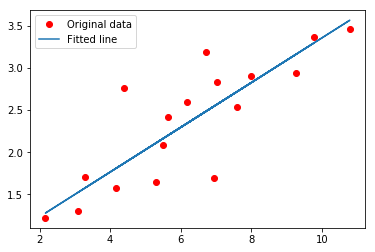

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

### 了解参数W是如何被优化的

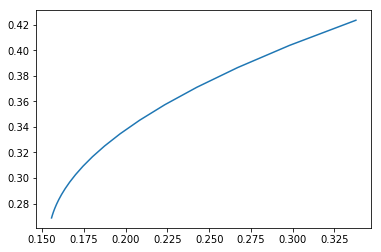

In [55]:
# Show the cost function
plt.plot(cost_history,W_history)
plt.show()

### 分析优化过程

<详见单独的Notebook: **02.sgd-explain**>

## Lab02：多元线性回归

In [135]:
# Lab Multi-variable linear regression
import tensorflow as tf

X = tf.constant([[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]])
Y = tf.constant([[152.],
          [185.],
          [180.],
          [196.],
          [142.]])

In [136]:
# Parameters.
learning_rate = 1e-5
training_steps = 1000
display_step = 50

N = X.shape[0]

> **注意：**此处如果继续使用1e-2的学习率，容易出现意想不到的结果，思考一下为什么？

In [137]:
W = tf.Variable(tf.random.uniform(shape=(3, 1)), name='weight')
b = tf.Variable(tf.random.uniform(shape=(1,)), name='bias')

In [138]:
# Linear regression (Wx + b).
def multi_linear_regression(X):
    return tf.matmul(X, W) + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [139]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = multi_linear_regression(X)
        pred = tf.squeeze(pred,axis=1)
        loss = mean_square(pred, Y)
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [140]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = multi_linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f" % (step, loss))

step: 50, loss: 8.062755
step: 100, loss: 7.956572
step: 150, loss: 7.855689
step: 200, loss: 7.759883
step: 250, loss: 7.669236
step: 300, loss: 7.583427
step: 350, loss: 7.502346
step: 400, loss: 7.425916
step: 450, loss: 7.354018
step: 500, loss: 7.286485
step: 550, loss: 7.223230
step: 600, loss: 7.164111
step: 650, loss: 7.109163
step: 700, loss: 7.058049
step: 750, loss: 7.010841
step: 800, loss: 6.967332
step: 850, loss: 6.927508
step: 900, loss: 6.891160
step: 950, loss: 6.858230
step: 1000, loss: 6.828803


## Lab03：逻辑回归（二分类）

In [202]:
import pandas as pd
import tensorflow as tf
import numpy as np

df = pd.read_csv('data/data-03-diabetes.csv', header=None, delimiter=',')

In [203]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [204]:
X = df[[0,1,2,3,4,5,6,7]].values
Y = df[8].values

In [205]:
X.shape,Y.shape

((759, 8), (759,))

In [206]:
X = tf.constant(X,dtype='float32')
Y = tf.constant(Y,dtype='float32')

In [207]:
# Parameters.
learning_rate = 1e-2
training_steps = 10000
display_step = 500

N = X.shape[0]

num_features = X.shape[1]
num_classes = 1

In [208]:
W = tf.Variable(tf.random.normal((num_features, num_classes)), name='weight')
b = tf.Variable(tf.random.normal([num_classes]), name='bias')

In [218]:
# Linear regression (Wx + b).
def logits_regression(x):
    return tf.sigmoid(tf.add(tf.matmul(x,W),b))

# loss/error.
def loss_f(y_pred, y_true):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) *
                       tf.math.log(1 - y_pred))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)


def accuracy(y_pred, y_true):
    # Accuracy computation
    # True if hypothesis>0.5 else False
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy

In [219]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logits_regression(X)
        pred = tf.squeeze(pred,axis=1)
        loss = loss_f(pred, Y)
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [220]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred =logits_regression(X)
        pred = tf.squeeze(pred,axis=1)
        loss = loss_f(pred, Y)
        acc = accuracy(pred, Y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 0.474027, accuracy: 0.770751
step: 100, loss: 0.474013, accuracy: 0.770751
step: 150, loss: 0.474000, accuracy: 0.770751
step: 200, loss: 0.473987, accuracy: 0.770751
step: 250, loss: 0.473974, accuracy: 0.770751
step: 300, loss: 0.473961, accuracy: 0.770751
step: 350, loss: 0.473948, accuracy: 0.770751
step: 400, loss: 0.473936, accuracy: 0.770751
step: 450, loss: 0.473923, accuracy: 0.770751
step: 500, loss: 0.473911, accuracy: 0.770751
step: 550, loss: 0.473898, accuracy: 0.770751
step: 600, loss: 0.473886, accuracy: 0.770751
step: 650, loss: 0.473873, accuracy: 0.770751
step: 700, loss: 0.473861, accuracy: 0.770751
step: 750, loss: 0.473849, accuracy: 0.770751
step: 800, loss: 0.473837, accuracy: 0.770751
step: 850, loss: 0.473826, accuracy: 0.770751
step: 900, loss: 0.473814, accuracy: 0.770751
step: 950, loss: 0.473802, accuracy: 0.770751
step: 1000, loss: 0.473790, accuracy: 0.770751
step: 1050, loss: 0.473779, accuracy: 0.770751
step: 1100, loss: 0.473767, accur

## Lab04：多分类问题

In [63]:
import pandas as pd
import tensorflow as tf
import numpy as np

df = pd.read_csv('data/data-04-zoo.csv', header=None, delimiter=',', 
                 skiprows=19,dtype=np.float32)

可以查看csv头文件了解数据属性

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0


In [65]:
X = df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
Y = df[16].values

In [66]:
Y = tf.constant(Y,dtype='int32')

In [67]:
X.shape, Y.shape

((101, 16), TensorShape([101]))

In [68]:
# Parameters.
learning_rate = 1e-3
training_steps = 1000
display_step = 50

N = X.shape[0]

num_features = X.shape[1]
num_classes = 7 # 0-6

In [69]:
W = tf.Variable(tf.random.normal((num_features, num_classes)), name='weight')
b = tf.Variable(tf.random.normal([num_classes]), name='bias')

In [70]:
# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes,dtype='float32')
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [71]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [72]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization(X, Y)
    
    if step % display_step == 0:
        pred = logistic_regression(X)
        loss = cross_entropy(pred, Y)
        acc = accuracy(pred, Y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 127.008980, accuracy: 0.653465
step: 100, loss: 77.531898, accuracy: 0.752475
step: 150, loss: 56.870773, accuracy: 0.801980
step: 200, loss: 44.896645, accuracy: 0.851485
step: 250, loss: 37.219360, accuracy: 0.891089
step: 300, loss: 31.910595, accuracy: 0.920792
step: 350, loss: 28.002146, accuracy: 0.920792
step: 400, loss: 24.982113, accuracy: 0.930693
step: 450, loss: 22.562653, accuracy: 0.930693
step: 500, loss: 20.570896, accuracy: 0.930693
step: 550, loss: 18.896671, accuracy: 0.940594
step: 600, loss: 17.466257, accuracy: 0.960396
step: 650, loss: 16.228222, accuracy: 0.960396
step: 700, loss: 15.145452, accuracy: 0.960396
step: 750, loss: 14.190332, accuracy: 0.970297
step: 800, loss: 13.341757, accuracy: 0.980198
step: 850, loss: 12.583241, accuracy: 0.980198
step: 900, loss: 11.901634, accuracy: 0.990099
step: 950, loss: 11.286284, accuracy: 1.000000
step: 1000, loss: 10.728416, accuracy: 1.000000


## Lab05 神经网络初探

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

### Softmax 多分类实现

In [85]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np

In [86]:
# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [87]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [88]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [89]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [90]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [91]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 767.078735, accuracy: 0.796875
step: 100, loss: 684.470215, accuracy: 0.808594
step: 150, loss: 515.767944, accuracy: 0.832031
step: 200, loss: 669.437866, accuracy: 0.769531
step: 250, loss: 566.289062, accuracy: 0.843750
step: 300, loss: 662.290955, accuracy: 0.835938
step: 350, loss: 589.762085, accuracy: 0.835938
step: 400, loss: 741.440613, accuracy: 0.785156
step: 450, loss: 575.987488, accuracy: 0.859375
step: 500, loss: 587.495605, accuracy: 0.839844
step: 550, loss: 432.354492, accuracy: 0.882812
step: 600, loss: 712.148743, accuracy: 0.832031
step: 650, loss: 399.105011, accuracy: 0.882812
step: 700, loss: 489.869934, accuracy: 0.886719
step: 750, loss: 538.771301, accuracy: 0.832031
step: 800, loss: 492.558899, accuracy: 0.851562
step: 850, loss: 683.367981, accuracy: 0.835938
step: 900, loss: 515.052734, accuracy: 0.882812
step: 950, loss: 746.603638, accuracy: 0.785156
step: 1000, loss: 656.285034, accuracy: 0.843750


In [92]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.837200


In [ ]:
# Visualize predictions.
import matplotlib.pyplot as plt

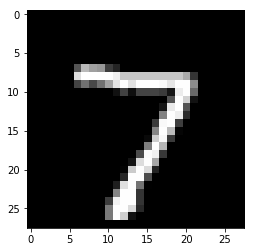

Model prediction: 7


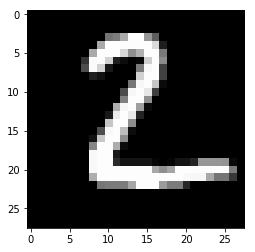

Model prediction: 2


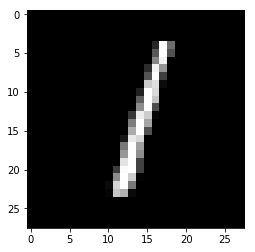

Model prediction: 1


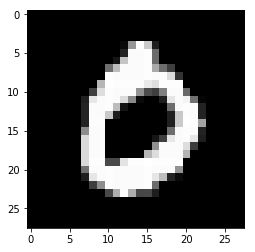

Model prediction: 0


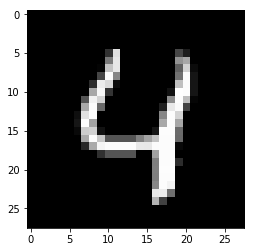

Model prediction: 4


In [93]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

### 多层神经网络

In [66]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np

In [67]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [68]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [69]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [70]:
# Store layers weight & bias

# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'h1': tf.Variable(random_normal([num_features, n_hidden_1])),
    'h2': tf.Variable(random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [71]:
# Create model.
def neural_net(x):
    # Hidden fully connected layer with 128 neurons.
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Apply sigmoid to layer_1 output for non-linearity.
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 256 neurons.
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Apply sigmoid to layer_2 output for non-linearity.
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [72]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [78]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [79]:
type(weights.values)

builtin_function_or_method

In [81]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 567.685974, accuracy: 0.218750
step: 200, loss: 424.903931, accuracy: 0.546875
step: 300, loss: 250.021454, accuracy: 0.703125
step: 400, loss: 164.471985, accuracy: 0.863281
step: 500, loss: 134.956329, accuracy: 0.851562
step: 600, loss: 137.645355, accuracy: 0.847656
step: 700, loss: 83.738953, accuracy: 0.921875
step: 800, loss: 94.185120, accuracy: 0.906250
step: 900, loss: 112.069740, accuracy: 0.875000
step: 1000, loss: 111.484192, accuracy: 0.890625
step: 1100, loss: 80.294548, accuracy: 0.917969
step: 1200, loss: 78.374878, accuracy: 0.910156
step: 1300, loss: 76.777313, accuracy: 0.902344
step: 1400, loss: 69.667892, accuracy: 0.921875
step: 1500, loss: 78.908661, accuracy: 0.914062
step: 1600, loss: 63.928055, accuracy: 0.914062
step: 1700, loss: 55.316723, accuracy: 0.941406
step: 1800, loss: 69.437943, accuracy: 0.917969
step: 1900, loss: 38.454224, accuracy: 0.964844
step: 2000, loss: 64.476868, accuracy: 0.917969
step: 2100, loss: 52.446049, accuracy: 0.

In [83]:
# Test model on validation set.
pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.935400


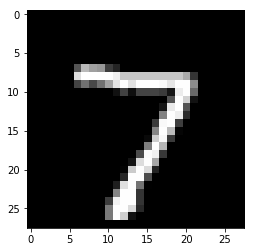

Model prediction: 7


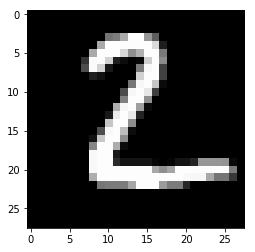

Model prediction: 2


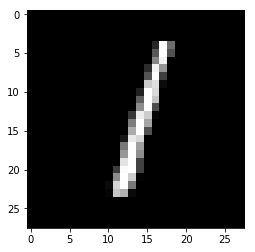

Model prediction: 1


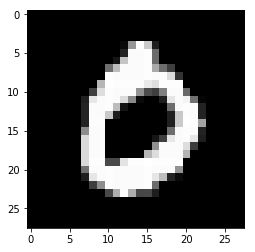

Model prediction: 0


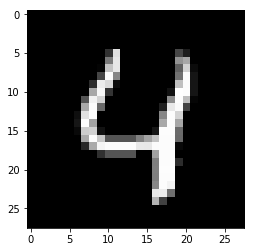

Model prediction: 4


In [84]:
# Visualize predictions.
import matplotlib.pyplot as plt

# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

### Keras实现

In [76]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [77]:
batch_size = 128
num_classes = 10
epochs = 12

In [79]:
# ==============================================================================
# prepare data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [83]:
X_train.shape

(60000, 784)

In [87]:
# ==============================================================================
# build model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',input_shape=(28*28,)),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3622 - accuracy: 0.9016
Epoch 2/12
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1655 - accuracy: 0.9522
Epoch 3/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1196 - accuracy: 0.9656
Epoch 4/12
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0935 - accuracy: 0.9736
Epoch 5/12
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0757 - accuracy: 0.9783
Epoch 6/12
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0630 - accuracy: 0.9819
Epoch 7/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0526 - accuracy: 0.9848
Epoch 8/12
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0444 - accuracy: 0.9876
Epoch 9/12
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0377 - accuracy: 0.9894
Epoch 10/12
60

In [88]:
# ==============================================================================
# predict
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0739 - accuracy: 0.9779

Test loss: 0.07387930654585362
Test accuracy: 0.9779
